In [1]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from pydicom.uid import ImplicitVRLittleEndian
from pydicom.dataset import Dataset, FileDataset
from pydicom.data import get_testdata_files
import datetime, time
import cv2

In [2]:
def load_dicom(filename="test.dcm"):
    file = pydicom.dcmread(path+filename)

    if(file.PatientName is not None):
        print("Imie pacjenta: ",file.PatientName)
    if(file.ImageComments is not None):
        print("Komentarze do zdjęcia: ",file.ImageComments) 
    if(file.StudyDate is not None):
        print("Data badań: ",file.StudyDate)
    plt.imshow(file.pixel_array,cmap='gray')
    plt.show()

In [3]:
def save_dicom(patientName,imageComments,studyDate,image,filename="test.dcm"): 
    test_data = get_testdata_files("CT_small.dcm")[0]
    ds = pydicom.dcmread(test_data)    
    if(patientName is not None):
        ds.PatientName = patientName
    if(imageComments is not None):
        ds.ImageComments = imageComments
    if(studyDate is not None):
        ds.StudyDate = studyDate
    #normalizacja wektora na wartosci int z przedzialu 0-1024
    result = image/np.max(image) * 1024
    np.round(result, decimals=0, out = result)
    result = result.astype('int16')
    #zmiana parametrow obrazu dicomu
    ds.Rows = result.shape[0]
    ds.Columns = result.shape[1]
    #zapisanie obrazu jako tablicy byte'ow
    ds.PixelData = result.tobytes()
    ds.save_as(filename+".dcm")
    print("File saved.")

In [4]:
save_dicom("Piotr Wietczak","Dobry kolega","20-02-2020",cv2.imread("test2.png",0),"testowy")

File saved.


Imie pacjenta:  Piotr Wietczak
Komentarze do zdjęcia:  Dobry kolega
Data badań:  20-02-2020


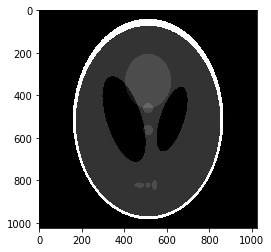

In [5]:
load_dicom("testowy.dcm")